In [1]:
import torchvision
import torchvision.transforms as transforms
import torch



In [2]:
# Define data transforms
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Example of iterating through the dataset
dataiter = iter(trainloader)
images, labels = next(dataiter)
print('Image batch shape:', images.shape)
print('Label batch shape:', labels.shape)


Files already downloaded and verified
Files already downloaded and verified
Image batch shape: torch.Size([4, 3, 32, 32])
Label batch shape: torch.Size([4])


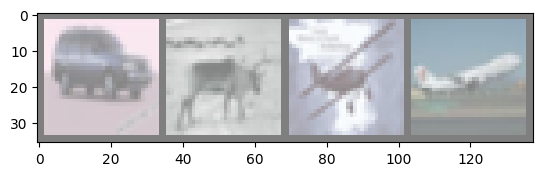

  car  deer plane plane


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [7]:
print("Training dataset size:", len(trainset))
print("Testing dataset size:", len(testset))


Training dataset size: 50000
Testing dataset size: 10000


In [7]:
# Select only 100 images
trainset_small = torch.utils.data.Subset(trainset, range(300))

# Create data loader
trainloader = torch.utils.data.DataLoader(trainset_small, batch_size=4, shuffle=True, num_workers=2)

In [13]:
# Get the labels from the smaller dataset
labels = np.array([label for _, label in trainset_small])

# Count occurrences of each class label
class_counts = np.bincount(labels, minlength=10)

# Print the counts for each class
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} images")

# Check if any class has zero images
if np.any(class_counts == 0):
    print("Warning: Some classes have zero images in the smaller training set.")
else:
    print("All classes have images in the smaller training set.")

Class 0: 23 images
Class 1: 42 images
Class 2: 27 images
Class 3: 30 images
Class 4: 26 images
Class 5: 26 images
Class 6: 36 images
Class 7: 28 images
Class 8: 26 images
Class 9: 36 images
All classes have images in the smaller training set.


In [4]:
import torch.nn as nn
import torch.optim as optim

In [15]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 120)  # Input size is 3x32x32 for CIFAR-10 images
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 64)
        self.fc4 = nn.Linear(64, 10)  # Output size is 10 for 10 classes in CIFAR-10

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [16]:
net = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [17]:
# Number of epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # Print every 10 mini-batches
            print('[Epoch %d, Mini-batch %5d] Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')


[Epoch 1, Mini-batch    10] Loss: 2.302
[Epoch 1, Mini-batch    20] Loss: 2.299
[Epoch 1, Mini-batch    30] Loss: 2.304
[Epoch 1, Mini-batch    40] Loss: 2.302
[Epoch 1, Mini-batch    50] Loss: 2.305
[Epoch 1, Mini-batch    60] Loss: 2.302
[Epoch 1, Mini-batch    70] Loss: 2.292
[Epoch 2, Mini-batch    10] Loss: 2.287
[Epoch 2, Mini-batch    20] Loss: 2.294
[Epoch 2, Mini-batch    30] Loss: 2.289
[Epoch 2, Mini-batch    40] Loss: 2.290
[Epoch 2, Mini-batch    50] Loss: 2.287
[Epoch 2, Mini-batch    60] Loss: 2.302
[Epoch 2, Mini-batch    70] Loss: 2.309
[Epoch 3, Mini-batch    10] Loss: 2.294
[Epoch 3, Mini-batch    20] Loss: 2.287
[Epoch 3, Mini-batch    30] Loss: 2.280
[Epoch 3, Mini-batch    40] Loss: 2.275
[Epoch 3, Mini-batch    50] Loss: 2.292
[Epoch 3, Mini-batch    60] Loss: 2.284
[Epoch 3, Mini-batch    70] Loss: 2.287
[Epoch 4, Mini-batch    10] Loss: 2.254
[Epoch 4, Mini-batch    20] Loss: 2.285
[Epoch 4, Mini-batch    30] Loss: 2.297
[Epoch 4, Mini-batch    40] Loss: 2.269


In [18]:
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # Print every 10 mini-batches
            print('[Epoch %d, Mini-batch %5d] Loss: %.3f | Accuracy: %.2f %%' %
                  (epoch + 1, i + 1, running_loss / 10, 100 * correct / total))
            running_loss = 0.0

print('Finished Training')


[Epoch 1, Mini-batch    10] Loss: 2.114 | Accuracy: 15.00 %
[Epoch 1, Mini-batch    20] Loss: 1.995 | Accuracy: 27.50 %
[Epoch 1, Mini-batch    30] Loss: 2.116 | Accuracy: 29.17 %
[Epoch 1, Mini-batch    40] Loss: 2.227 | Accuracy: 25.00 %
[Epoch 1, Mini-batch    50] Loss: 2.193 | Accuracy: 24.50 %
[Epoch 1, Mini-batch    60] Loss: 2.231 | Accuracy: 22.50 %
[Epoch 1, Mini-batch    70] Loss: 2.053 | Accuracy: 23.57 %
[Epoch 2, Mini-batch    10] Loss: 2.185 | Accuracy: 22.50 %
[Epoch 2, Mini-batch    20] Loss: 2.034 | Accuracy: 23.75 %
[Epoch 2, Mini-batch    30] Loss: 2.082 | Accuracy: 22.50 %
[Epoch 2, Mini-batch    40] Loss: 2.069 | Accuracy: 22.50 %
[Epoch 2, Mini-batch    50] Loss: 2.108 | Accuracy: 20.50 %
[Epoch 2, Mini-batch    60] Loss: 2.019 | Accuracy: 22.50 %
[Epoch 2, Mini-batch    70] Loss: 2.060 | Accuracy: 23.93 %
[Epoch 3, Mini-batch    10] Loss: 1.967 | Accuracy: 30.00 %
[Epoch 3, Mini-batch    20] Loss: 2.127 | Accuracy: 21.25 %
[Epoch 3, Mini-batch    30] Loss: 2.055 

In [20]:
# Initialize the neural network model
net = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Using Adam optimizer

# Number of epochs
num_epochs = 10
train_loss_history = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # Print every 10 mini-batches
            print('[Epoch %d, Mini-batch %5d] Loss: %.3f | Accuracy: %.2f %%' %
                  (epoch + 1, i + 1, running_loss / 10, 100 * correct / total))
            running_loss = 0.0
    train_loss_history.append(running_loss / len(trainloader))

print('Finished Training')


[Epoch 1, Mini-batch    10] Loss: 2.303 | Accuracy: 12.50 %
[Epoch 1, Mini-batch    20] Loss: 2.341 | Accuracy: 11.25 %
[Epoch 1, Mini-batch    30] Loss: 2.394 | Accuracy: 10.83 %
[Epoch 1, Mini-batch    40] Loss: 2.334 | Accuracy: 11.25 %
[Epoch 1, Mini-batch    50] Loss: 2.330 | Accuracy: 9.50 %
[Epoch 1, Mini-batch    60] Loss: 2.309 | Accuracy: 9.58 %
[Epoch 1, Mini-batch    70] Loss: 2.292 | Accuracy: 10.36 %
[Epoch 2, Mini-batch    10] Loss: 2.213 | Accuracy: 17.50 %
[Epoch 2, Mini-batch    20] Loss: 2.296 | Accuracy: 13.75 %
[Epoch 2, Mini-batch    30] Loss: 2.211 | Accuracy: 10.83 %
[Epoch 2, Mini-batch    40] Loss: 2.299 | Accuracy: 12.50 %
[Epoch 2, Mini-batch    50] Loss: 2.286 | Accuracy: 11.50 %
[Epoch 2, Mini-batch    60] Loss: 2.275 | Accuracy: 10.83 %
[Epoch 2, Mini-batch    70] Loss: 2.182 | Accuracy: 12.14 %
[Epoch 3, Mini-batch    10] Loss: 2.142 | Accuracy: 20.00 %
[Epoch 3, Mini-batch    20] Loss: 2.233 | Accuracy: 16.25 %
[Epoch 3, Mini-batch    30] Loss: 2.155 | 

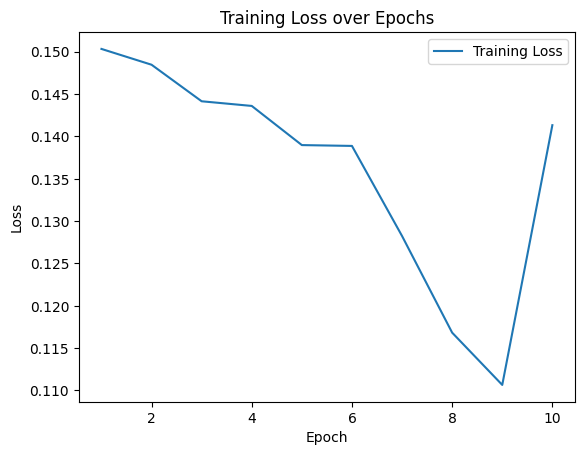

In [21]:
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [17]:
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 120)  # Input size is 3x32x32 for CIFAR-10 images
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 64)
        self.fc4 = nn.Linear(64, 10)  # Output size is 10 for 10 classes in CIFAR-10

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# initialize the NN
model = SimpleNN()
print(model)


SimpleNN(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
# Select only 50000 images
trainset_small = torch.utils.data.Subset(trainset, range(50000))

# Create data loader
trainloader = torch.utils.data.DataLoader(trainset_small, batch_size=4, shuffle=True, num_workers=2)

In [20]:


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Using SGD optimizer

# Number of epochs
num_epochs = 10

# Lists to store training loss
train_loss_history = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print statistics
        running_loss += loss.item()
            
    # Save the average training loss for the epoch
    running_loss = running_loss/len(trainloader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        running_loss
        ))
    train_loss_history.append(running_loss / len(trainloader))

print('Finished Training')




Epoch: 1 	Training Loss: 0.426812
Epoch: 2 	Training Loss: 0.405339
Epoch: 3 	Training Loss: 0.391466
Epoch: 4 	Training Loss: 0.380095
Epoch: 5 	Training Loss: 0.372303
Epoch: 6 	Training Loss: 0.364410
Epoch: 7 	Training Loss: 0.358354
Epoch: 8 	Training Loss: 0.352498
Epoch: 9 	Training Loss: 0.346740
Epoch: 10 	Training Loss: 0.342379
Finished Training


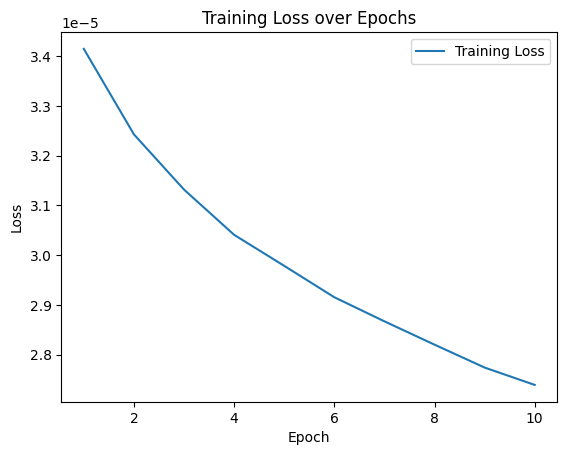

In [21]:
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()